In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

def intg(d):
    return (d[510:570] - d[:500].mean()).sum()

def histdata(array):
    hist, edges = np.histogram(array, bins=5000, range=(0,5000))
    return hist, edges

total_hist = np.zeros(5000)
#print(total_hist)
path = '/Users/r.shinoda/p1/data'
direction = 'up'   #edit here!!!!!!
date = '02140929'   #edit here!!!!!!
data_path = os.path.join(path, direction + date, date + direction)
print(data_path)

num_of_loops = 47   #edit here!!!!!!

/Users/r.shinoda/p1/data/up02140929/02140929up


In [2]:
for loop in range(num_of_loops):
    file_path = os.path.join(data_path +str(loop)+ '.txt')
    print(file_path)
    with open(file_path) as f:
        lines = f.readlines()
        num = len(lines)/1023
        print(num)
        # test = np.array([int(line) for line in lines[:1023]])
        # test.mean()
        # plt.figure()
        # plt.plot(test - test[0:500].mean())
        # plt.xlim([500, 600])

        # del test
        
        N_points = 1023
        data = np.array([int(line) for line in lines])
        length = len(data)//N_points
        data_res = data[:length * N_points].reshape(-1, N_points)

        del data
        
        array = [-intg(d) for d in data_res]

        del data_res
        
        hist, edges = histdata(array)

        del array
        
        total_hist += hist
        
        # plt.figure()
        # plt.plot(edges[:-1], hist)
        # plt.xlim([0, 5000])
        # plt.xlabel('energy')
        # plt.ylabel('ADC counts in loop' + str(loop))

/Users/r.shinoda/p1/data/up02140929/02140929up0.txt
66791.0
/Users/r.shinoda/p1/data/up02140929/02140929up1.txt
66039.0
/Users/r.shinoda/p1/data/up02140929/02140929up2.txt
65002.0
/Users/r.shinoda/p1/data/up02140929/02140929up3.txt
63962.0
/Users/r.shinoda/p1/data/up02140929/02140929up4.txt
62829.0
/Users/r.shinoda/p1/data/up02140929/02140929up5.txt
62009.0
/Users/r.shinoda/p1/data/up02140929/02140929up6.txt
61777.0
/Users/r.shinoda/p1/data/up02140929/02140929up7.txt
60595.0
/Users/r.shinoda/p1/data/up02140929/02140929up8.txt
59562.0
/Users/r.shinoda/p1/data/up02140929/02140929up9.txt
58590.0
/Users/r.shinoda/p1/data/up02140929/02140929up10.txt
58058.0
/Users/r.shinoda/p1/data/up02140929/02140929up11.txt
57674.0
/Users/r.shinoda/p1/data/up02140929/02140929up12.txt
56432.0
/Users/r.shinoda/p1/data/up02140929/02140929up13.txt
55949.0
/Users/r.shinoda/p1/data/up02140929/02140929up14.txt
55387.0
/Users/r.shinoda/p1/data/up02140929/02140929up15.txt
54320.0
/Users/r.shinoda/p1/data/up0214092

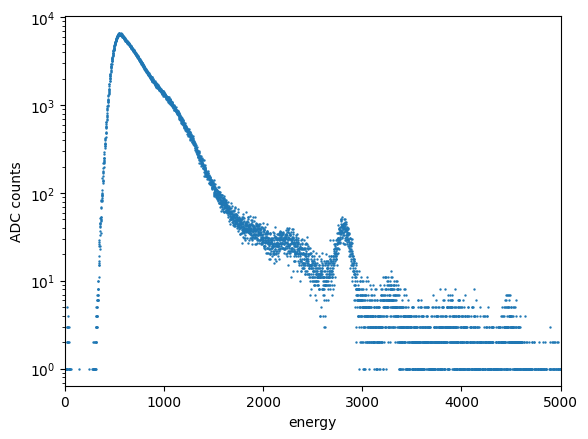

In [5]:
plt.figure()
plt.scatter(edges[:-1], total_hist, s=0.5)
plt.xlim([0, 5000])
plt.yscale('log')
plt.xlabel('energy')
plt.ylabel('ADC counts')
plt.show()

In [29]:
total_path = data_path + 'with' + str(num_of_loops) + 'loops.npy'
print(total_path)

/Users/r.shinoda/p1/data/up02131758/02131758upwith75loops.npy


In [30]:
np.save(total_path, total_hist)

In [31]:
edge_path = data_path + '_edges.npy'
print(edge_path)

/Users/r.shinoda/p1/data/up02131758/02131758up_edges.npy


In [32]:
np.save(edge_path, edges)